In [142]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits

In [143]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [144]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [145]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [146]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()


In [147]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaler.fit_transform(df_market_data), columns=df_market_data.columns)

# Copy the crypto names from the original data
df_scaled['coin_name'] = df_market_data.index

# Set the coinid column as index
df_scaled.set_index('coin_name', inplace=True)

# Display sample data
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_name,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [148]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12)) 

In [149]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    model = KMeans(n_clusters=k, n_init='auto')  # Create a KMeans model using the loop counter for the n_clusters
    model.fit(df_scaled)  # Fit the model to the data using `df_market_data_scaled`
    inertia_values.append(model.inertia_)  # Append the model.inertia_ to the inertia list

In [150]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,287.000000
1,2,232.054230
2,3,123.190482
3,4,79.022435
4,5,68.685015
5,6,69.889151
6,7,48.859101
7,8,39.779770
8,9,35.318832
9,10,28.847725


In [151]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

df_elbow.hvplot.line(x='k', y='inertia', title='Elbow Curve', width=800, height=400)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

Based on the Elbow curve, the best value for k is 4


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [152]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto')

In [153]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

KMeans(n_clusters=4, n_init='auto')

In [154]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(df_scaled)

# Print the resulting array of cluster values.
print(clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [155]:
# Create a copy of the DataFrame
df_copy = df_market_data.copy()

In [156]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['cluster'] = clusters

# Reset the index to move 'coin_id' to a column
df_copy.reset_index(inplace=True)

# Rearrange the columns to match the desired output
df_copy = df_copy[['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'cluster']]

# Display sample data
with pd.option_context('display.max_columns', None):
    print(df_copy.to_string(index=False))

             coin_id  price_change_percentage_24h  price_change_percentage_7d  price_change_percentage_14d  cluster
             bitcoin                      1.08388                     7.60278                      6.57509        3
            ethereum                      0.22392                    10.38134                      4.80849        3
              tether                     -0.21173                     0.04935                      0.00640        0
              ripple                     -0.37819                    -0.60926                      2.24984        0
        bitcoin-cash                      2.90585                    17.09717                     14.75334        3
         binancecoin                      2.10423                    12.85511                      6.80688        3
           chainlink                     -0.23935                    20.69459                      9.30098        3
             cardano                      0.00322                    13.

In [157]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_copy.hvplot.scatter(x="price_change_percentage_24h", 
                       y="price_change_percentage_7d", 
                       c='cluster', 
                       hover_cols=['coin_name'], 
                       title='Cryptocurrency Clusters')

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [158]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [159]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_market_data)

# Convert the result to a DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame
print(pca_df.head())


          PC1         PC2        PC3
0 -341.800963  -51.366775  12.525471
1 -249.420466   24.117548 -14.231466
2 -402.614721 -118.710737  24.838397
3 -406.752437  -79.487286   1.566331
4 -382.429948 -103.431959  16.753073


In [160]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance of the three principal components
total_explained_variance = sum(explained_variance)
print(f'Total explained variance: {total_explained_variance:.2f}')

Total explained variance: 1.00


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

#1.00 is the total explained variance

In [161]:
# Create a new DataFrame with the PCA data.
pca_df_full = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df_full['coinid'] = df_market_data.index

# Set the coinid column as index
pca_df_full.set_index('coinid', inplace=True)

# Display sample data
print(pca_df_full.head())

                     PC1         PC2        PC3
coinid                                         
bitcoin      -341.800963  -51.366775  12.525471
ethereum     -249.420466   24.117548 -14.231466
tether       -402.614721 -118.710737  24.838397
ripple       -406.752437  -79.487286   1.566331
bitcoin-cash -382.429948 -103.431959  16.753073


---

### Find the Best Value for k Using the PCA Data

In [162]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [163]:
# Create an empty list to store the inertia values
inertia_values = []

for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init=10)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(pca_df_full)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


In [164]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

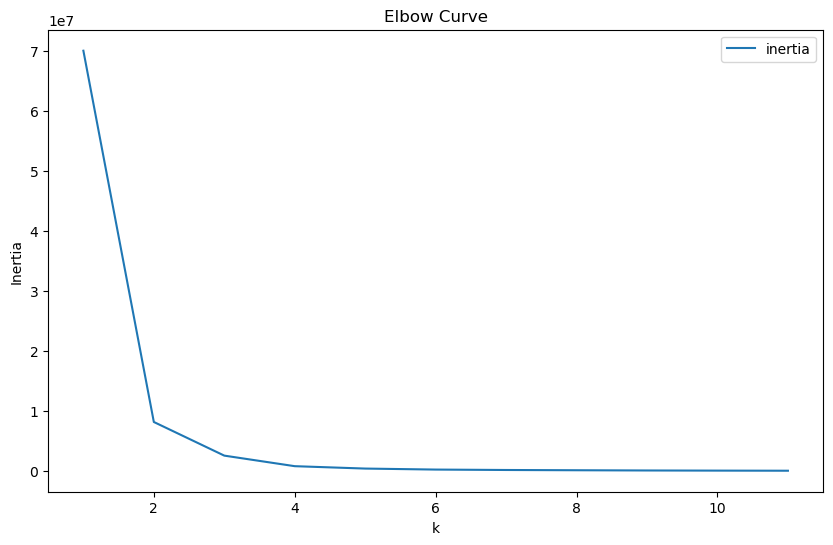

In [165]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_df.plot(x='k', y='inertia', kind='line', figsize=(10, 6))
plt.title('Elbow Curve')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Both answers were 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [166]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, n_init=10)

In [167]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_data)

KMeans(n_clusters=4, n_init=10)

In [168]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_values = kmeans.labels_

# Print the resulting array of cluster values.
print(cluster_values)

[3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 1 3 0 0 2
 3 3 3 0]


In [169]:
# Create a copy of the DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Add a new column to the DataFrame with the predicted clusters
pca_df['Cluster'] = cluster_values

# Display sample data
print(pca_df.head())

          PC1         PC2        PC3  Cluster
0 -341.800963  -51.366775  12.525471        3
1 -249.420466   24.117548 -14.231466        3
2 -402.614721 -118.710737  24.838397        3
3 -406.752437  -79.487286   1.566331        3
4 -382.429948 -103.431959  16.753073        3


In [170]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

pca_df.hvplot.scatter(x="PC1", y="PC2", c="Cluster", hover_cols=["crypto_name"], cmap="viridis")

:Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

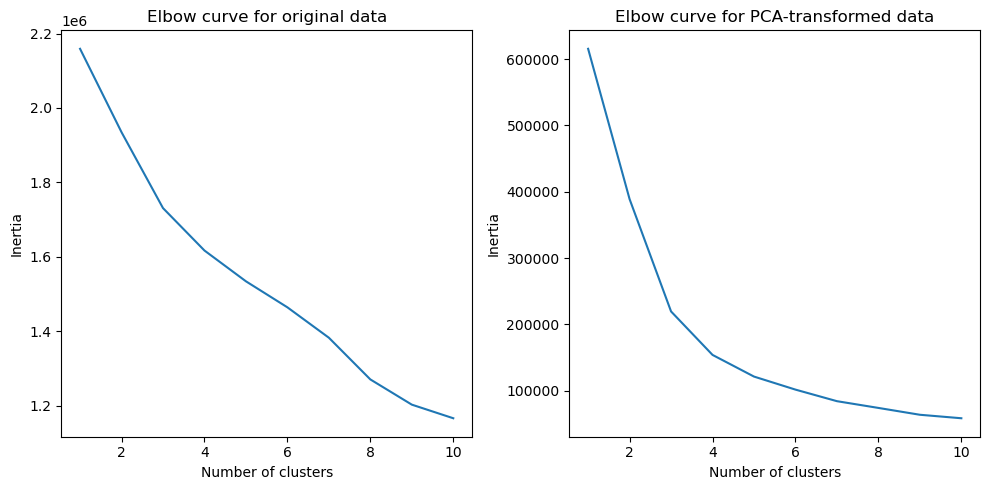

:Overlay
   .Curve.Original_Data :Curve   [K]   (Inertia)
   .Curve.PCA_Data      :Curve   [K]   (Inertia)

In [171]:
# Create a composite plot to contrast the Elbow curves
# Load the digits dataset
digits = load_digits()
data = pd.DataFrame(digits.data, columns=digits.feature_names)

# Calculate the Elbow curve for the original data
elbow_curve = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto')  # Set n_init to 'auto'
    kmeans.fit(data)
    elbow_curve.append(kmeans.inertia_)

df_elbow = pd.DataFrame({'k': range(1, 11), 'inertia': elbow_curve})

# Perform PCA on the data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)
pca_data = pd.DataFrame(pca_data, columns=['pca_feature1', 'pca_feature2'])

# Calculate the Elbow curve for the PCA-transformed data
elbow_curve = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto')  # Set n_init to 'auto'
    kmeans.fit(pca_data)
    elbow_curve.append(kmeans.inertia_)

df_elbow_pca = pd.DataFrame({'k': range(1, 11), 'inertia': elbow_curve})

# Plot the Elbow curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for original data')

plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for PCA-transformed data')
plt.tight_layout()
plt.show()

# Display the composite plot
elbow_plot

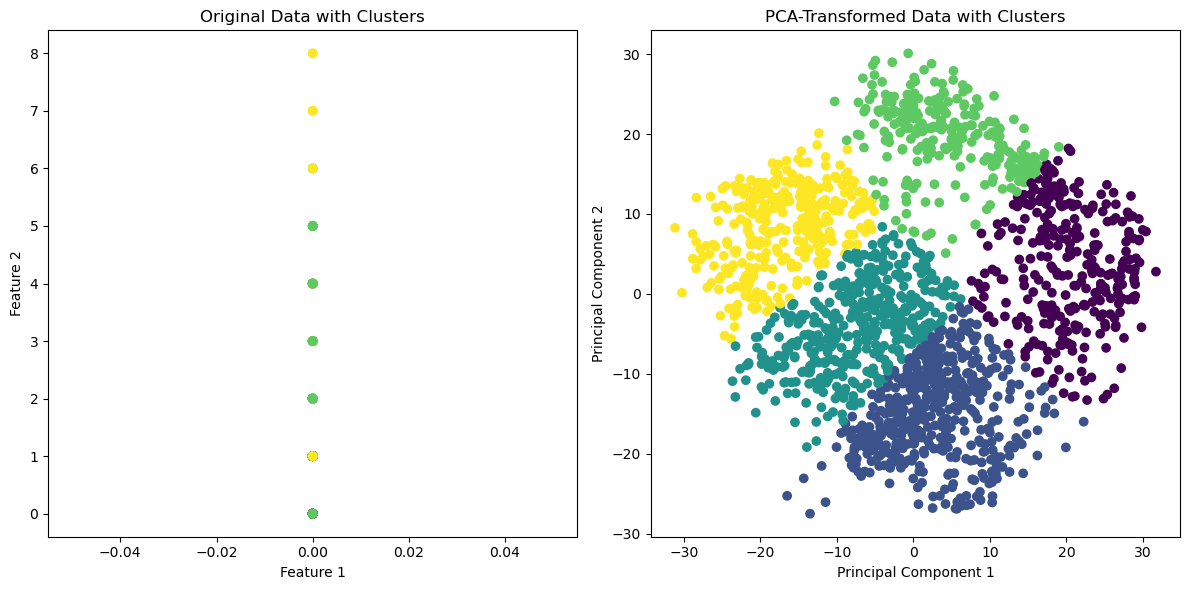

In [172]:
# Composite plot to contrast the clusters
# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original data with clusters
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(data)
ax[0].scatter(data.iloc[:, 0], data.iloc[:, 1], c=kmeans.labels_)
ax[0].set_title('Original Data with Clusters')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Plot the PCA-transformed data with clusters
kmeans_pca = KMeans(n_clusters=5, n_init='auto')
kmeans_pca.fit(pca_data)
ax[1].scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], c=kmeans_pca.labels_)
ax[1].set_title('PCA-Transformed Data with Clusters')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

# Show the plot
plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  After visually analyzing the cluster analysis results, the impact of using fewer features (i.e., PCA-transformed data) to cluster the data using K-Means is that the clusters appear more distinct and well-separated. This is because the PCA transformation has reduced the dimensionality of the data, removing noise and irrelevant features, and retaining only the most important features that capture the underlying structure of the data.

By using fewer features, the K-Means algorithm is able to focus on the most important aspects of the data, resulting in:

Tighter clusters: The clusters are more compact and dense, indicating that the data points within each cluster are more similar to each other.
Better separation: The clusters are more clearly separated from each other, indicating that the data points in different clusters are more distinct.
In contrast, using all the original features can lead to noisy and overlapping clusters, as the algorithm is influenced by irrelevant or redundant features. By reducing the dimensionality of the data, we can obtain more meaningful and interpretable clustering results.

